# MNIST

This example takes from the official Pytorch tutorial on an [FGSM Adversal Attack](https://pytorch.org/tutorials/beginner/fgsm_tutorial.html) which was instrumental for us to figure out how to build the `dropviz` package.

This LeNet model has dropout in two places. It has a Dropout2d layer before `fc1` and it has simple dropout between `fc1` and `fc2`.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

import dropviz

In [2]:
# turn of ticks because we are only plotting images
plt.rcParams['xtick.bottom'] = False
plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.labelleft'] = False

In [3]:
# LeNet Model definition
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [4]:
pretrained_model = "lenet_mnist_model.pth"
use_cuda=True

# Define what device we are using
print("CUDA Available: ",torch.cuda.is_available())
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

# Initialize the network
model = Net().to(device)

# Load the pretrained model
model.load_state_dict(torch.load(pretrained_model, map_location='cpu'))

CUDA Available:  True


<All keys matched successfully>

In [5]:
# MNIST Test dataset and dataloader declaration
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data/mnist/', train=False, download=True, transform=transforms.Compose([
            transforms.ToTensor(),
            ])),
        batch_size=1, shuffle=False)

# Augmenting by Layer FC1

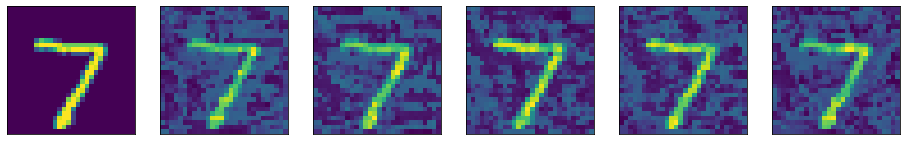

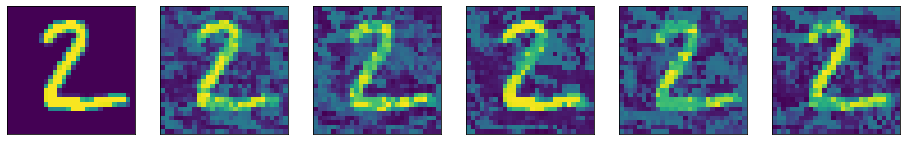

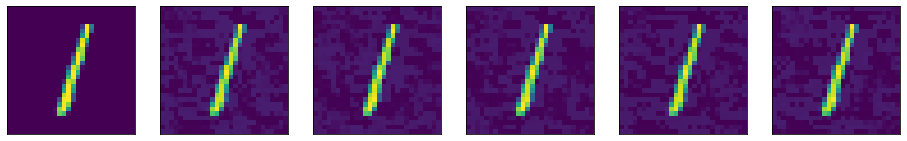

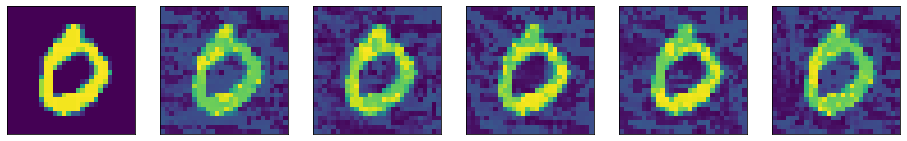

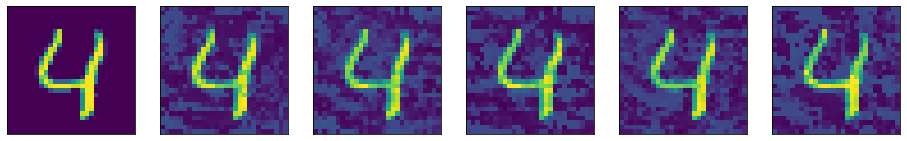

In [6]:
# make the data loader iterable so we can call next()
data_iter = iter(test_loader)

N = 5

for i in range(N):
    
    # sample
    data, target = next(data_iter)

    # augment
    corrupted_images, output = dropviz.augment(model, model.fc1, device, data, 5, 10000, 0.05, 0.0001)
    
    # plot
    fig, ax = plt.subplots(1, len(corrupted_images)+1, figsize=(16,20))
    
    ax[0].imshow(data.reshape(28, 28))
    for n in range(len(corrupted_images)):
        ax[n+1].imshow(corrupted_images[n])
    plt.show()

# Augmenting by Layer FC2

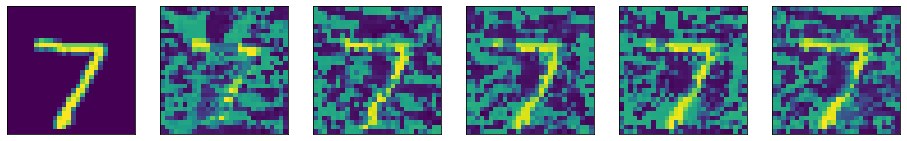

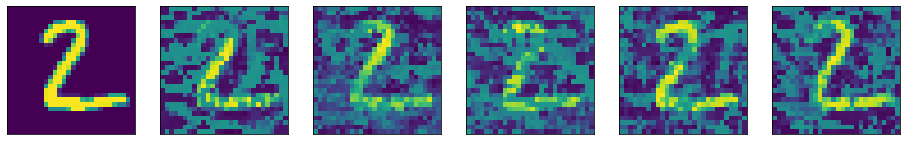

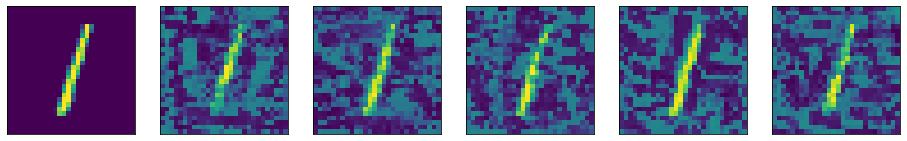

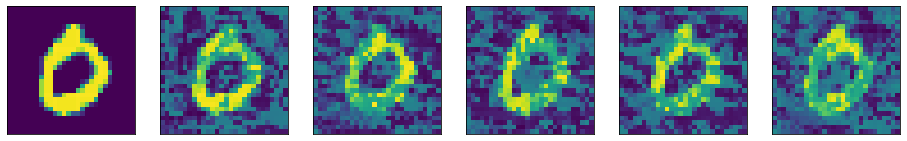

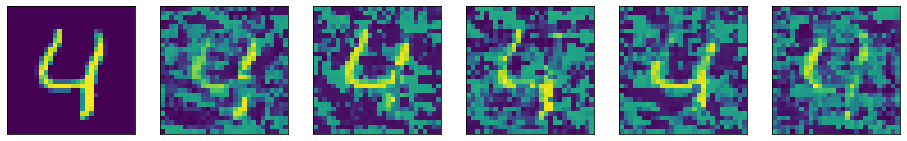

In [8]:
# make a new iterator so we get the same samples
data_iter = iter(test_loader)

N = 5

for i in range(N):
    
    # sample
    data, target = next(data_iter)

    # augment
    corrupted_images, output = dropviz.augment(model, model.fc2, device, data, 5, 10000, 0.05, 0.0001)
    
    # plot
    f, ax = plt.subplots(1, len(corrupted_images)+1, figsize=(16,20))
    ax[0].imshow(data.reshape(28, 28))
    for n in range(len(corrupted_images)):
        ax[n+1].imshow(corrupted_images[n])
    plt.show()